# Audio File Clustering Analysis

### **Author:** Chris Gao

This script is designed to perform clustering on audio files based on their extracted MFCC features. Here's a step-by-step breakdown of the procedure:

### **Step 1: Importing Essential Libraries**

The script begins by importing crucial Python libraries and modules such as os, shutil, numpy, and others. These are vital for file operations, feature extraction, and the clustering process.

### **Step 2: Path Configuration**

Paths for the main directory containing the audio files and the output directory for the cleaned files are set.

### **Step 3: Feature Extraction**

A function named 'extract_features' is defined. This function uses the librosa library to derive the MFCC features from each audio file.

### **Step 4: K-Means Clustering**

Several functions are crafted to streamline the K-Means clustering:

* 'perform_clustering' carries out K-Means clustering on the given feature set.

* 'find_optimal_clusters' utilizes the Elbow method to pinpoint the optimal cluster count.

* 'analyze_clusters' computes average distances and the silhouette score, shedding light on the clustering's effectiveness.

### **Step 5: Visualization of Results**

Specific functions are established to visualize the clustering outcomes:

* 'plot_cluster_distribution' renders the distribution of clusters.

* 'visualize_clusters' employs PCA for dimensionality reduction, thus visualizing the clusters in a 2D space.

### **Step 6: Saving the Results**

A function 'save_results' segregates the audio files into individual directories based on their cluster designation.

### **Step 7: Main Script Execution**

The main script iterates across all directories, applying the following sequences for every class of audio files:

* Load each audio file and derive MFCC features.

* Determine the optimal cluster count via the Elbow method.

* Implement K-Means clustering, settling on 6 as the optimal number of clusters.

* Evaluate clusters, disclosing average distances to cluster centers and the silhouette score.

* Showcase cluster distribution and the PCA-reduced clusters in a 2D visualization.

* Archive the results in designated directories.

### **Usage Instructions**

* Modify paths and parameters as required.

* Initiate the script in a Jupyter Notebook setting.

* Examine the output directory for clustered audio files and the corresponding visualizations.

### **Note on Choosing 6 Clusters:**

The choice of 6 clusters was found to be optimal for this dataset. The Elbow method, a standard technique in determining the ideal number of clusters, indicated a notable inflection point at 6. This suggests that increasing the number of clusters beyond this point would result in diminishing returns in terms of intra-cluster similarity. Therefore, 6 clusters provided a balance between granularity and computational efficiency, ensuring that the audio files within each cluster were similar, yet distinct from other clusters.

In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pydub import AudioSegment
from pydub.silence import split_on_silence
from sklearn.decomposition import PCA

In [2]:
# Set paths
main_folder_path = 'c:\\Users\\ASUS\\Downloads\\b3'
cleaned_folder_path = 'c:\\Users\\ASUS\\Downloads\\b3_cleaned5'


In [3]:
# Function to extract MFCC features from a file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs.mean(axis=1)

# (Include all other function definitions here: perform_clustering, save_results, etc.)




# Function to perform k-means clustering
def perform_clustering(features_list, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(np.vstack(features_list))
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    return labels, cluster_centers

# Function to save results in separate directories based on cluster labels
def save_results(labels, file_paths, output_directory):
    for label, file_path in zip(labels, file_paths):
        destination = os.path.join(output_directory, str(label))
        os.makedirs(destination, exist_ok=True)
        shutil.copy(file_path, destination)

# Function to plot the distribution of clusters
def plot_cluster_distribution(labels):
    sns.countplot(x=labels)
    plt.title('Cluster Distribution')
    plt.xlabel('Cluster Label')
    plt.ylabel('Count')
    plt.show()
def find_optimal_clusters(features_list, max_k):
    distortions = []
    K_range = range(1, max_k+1)
    for i in K_range:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(np.vstack(features_list))
        distortions.append(kmeans.inertia_)

    plt.figure()
    plt.plot(K_range, distortions, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()



# Function to visualize clusters using PCA
def visualize_clusters(features_list, labels, class_folder):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features_list)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette='Spectral', s=60)
    plt.title(f'PCA Cluster Visualization for Class: {class_folder}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

# Function to analyze clusters and return average distances and silhouette score
def analyze_clusters(features_list, labels, cluster_centers):
    avg_distances = []
    for i, center in enumerate(cluster_centers):
        members = np.array(features_list)[labels == i]
        distances = np.linalg.norm(members - center, axis=1)
        avg_distances.append(distances.mean())
    sil_score = silhouette_score(np.array(features_list), labels)
    return avg_distances, sil_score

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1985
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X,

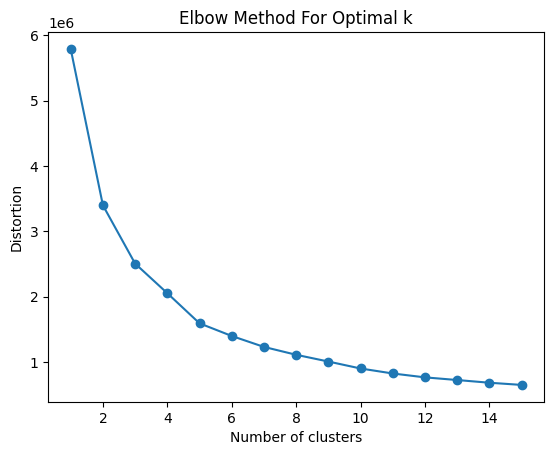

Class: Alauda Arvensis
Average distances to cluster centers: [45.002686, 55.224983, 64.982735, 48.27793, 50.999897, 60.40423]
Silhouette score: 0.3228626251220703


C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


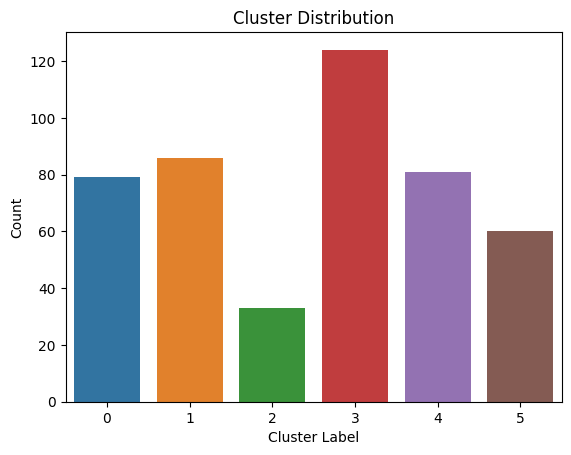

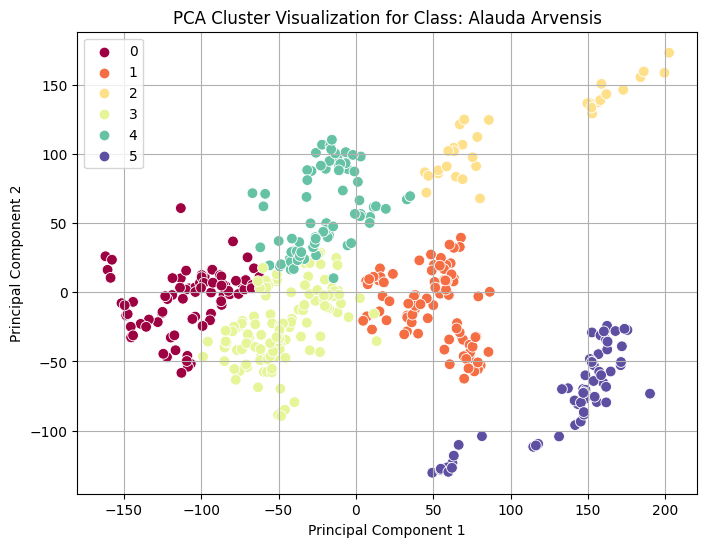

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1742
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1632
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1697
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to supp

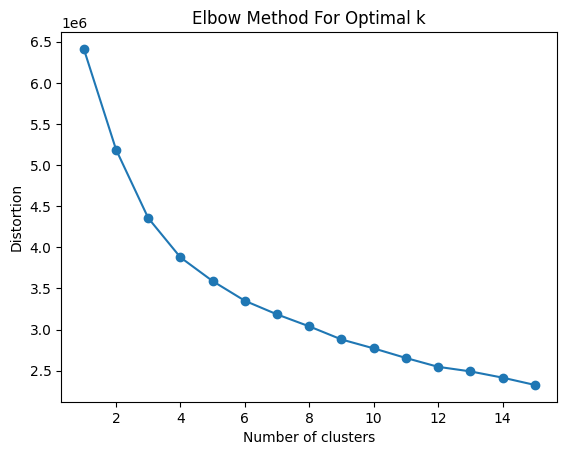

Class: Caligavis Chrysops
Average distances to cluster centers: [58.02176, 70.79465, 63.61045, 55.876587, 59.408253, 64.89621]
Silhouette score: 0.17659926414489746


C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


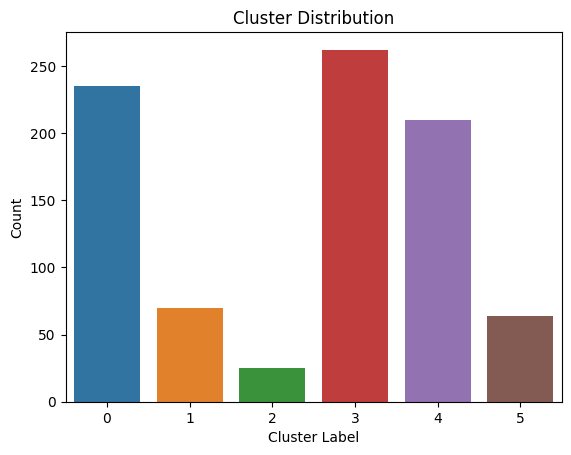

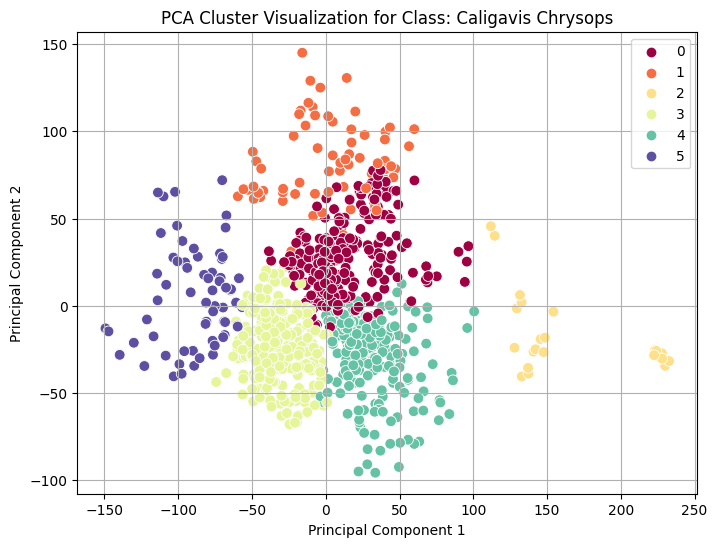

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1897
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X,

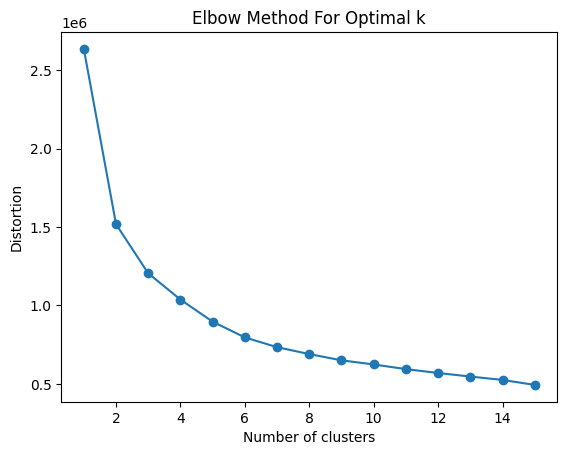

Class: Capra Hircus
Average distances to cluster centers: [33.88758, 46.586105, 59.514763, 37.200134, 53.266792, 52.007626]
Silhouette score: 0.2740526795387268


C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


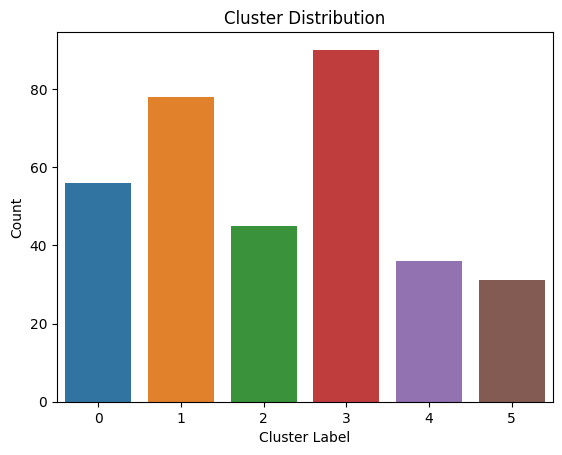

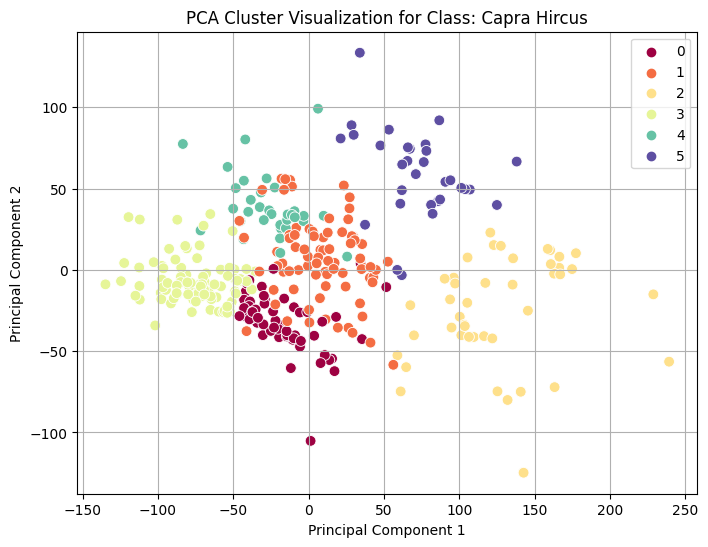

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1411
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1720
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1918
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to supp

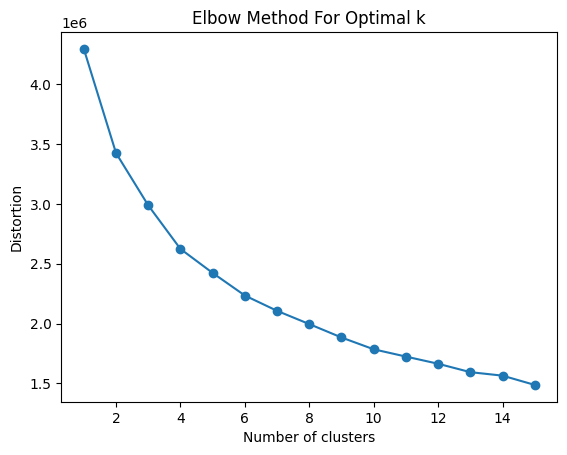

Class: Colluricincla Harmonica
Average distances to cluster centers: [77.24896, 74.58254, 67.32436, 70.0842, 71.03832, 67.60993]
Silhouette score: 0.1799936294555664


C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


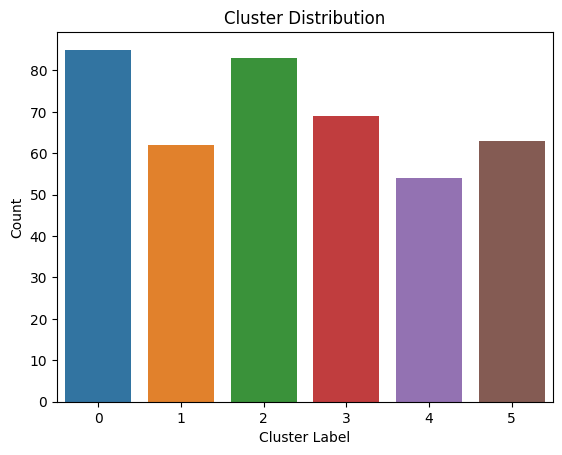

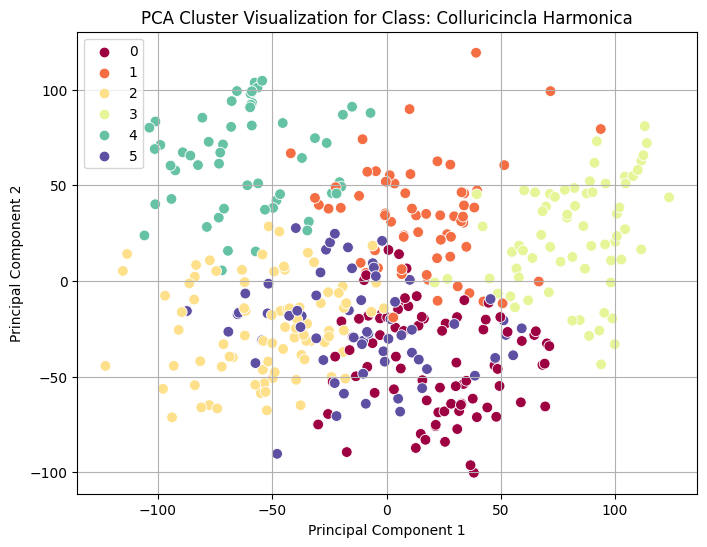

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1500
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1300
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

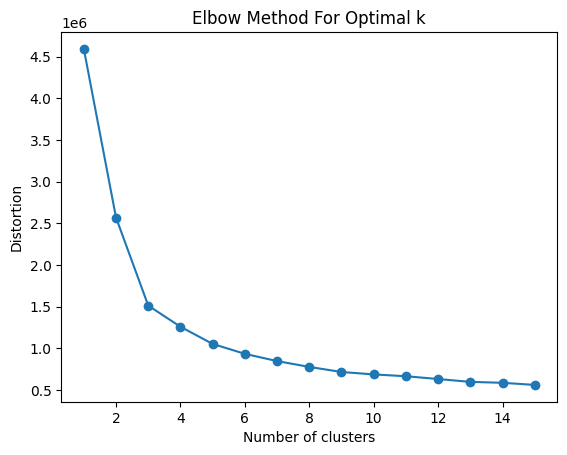

Class: Corvus Coronoides
Average distances to cluster centers: [60.793076, 46.10993, 53.24339, 47.27423, 56.285194, 42.24383]
Silhouette score: 0.3552926778793335


C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


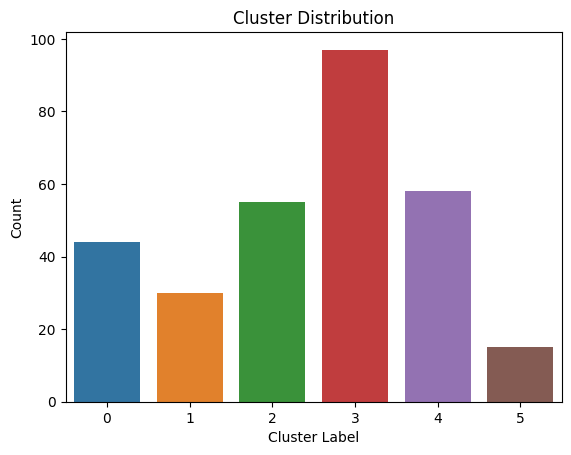

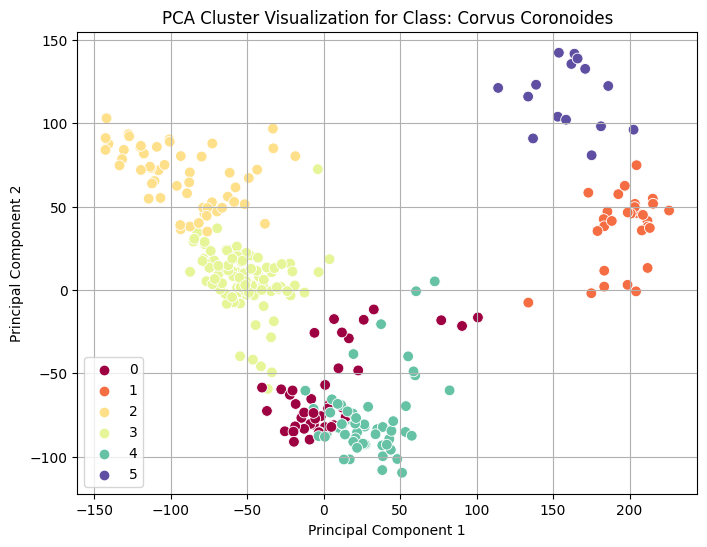

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1764
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1235
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

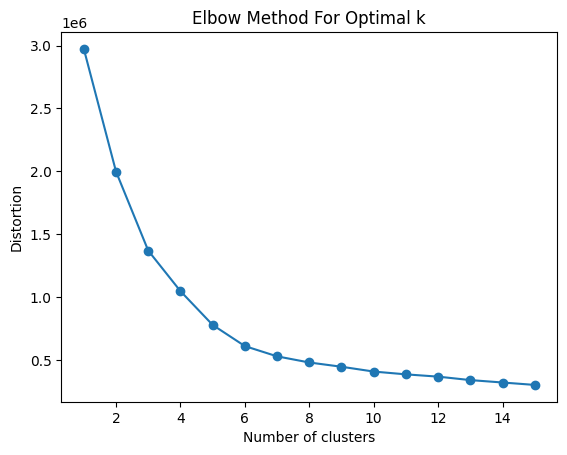

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Class: Dama Dama
Average distances to cluster centers: [44.585716, 49.706825, 46.17719, 26.777216, 41.64317, 40.09634]
Silhouette score: 0.3715924322605133


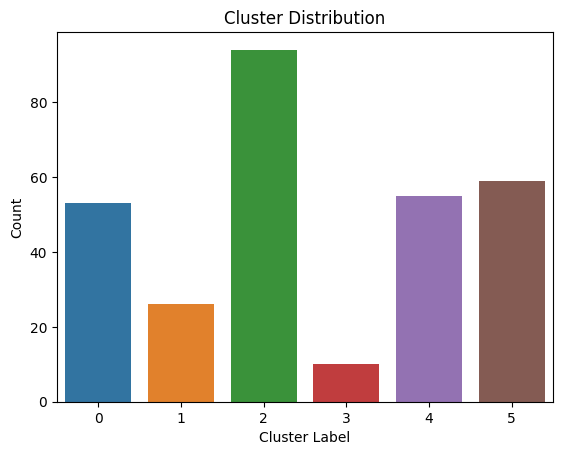

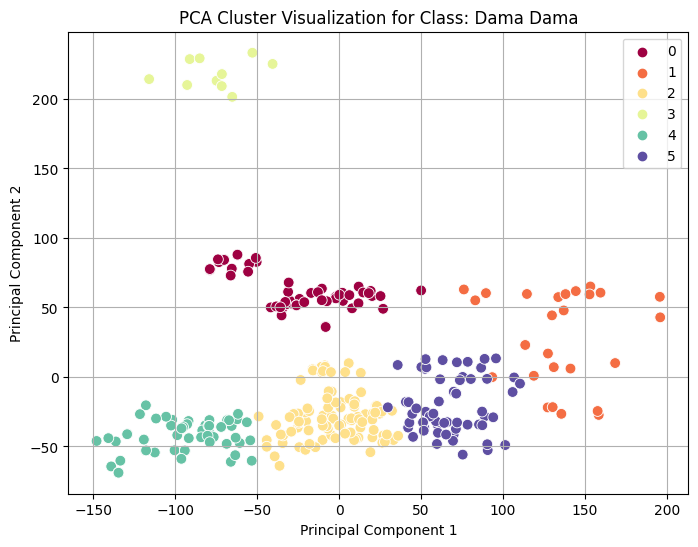

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1720
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1213
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to supp

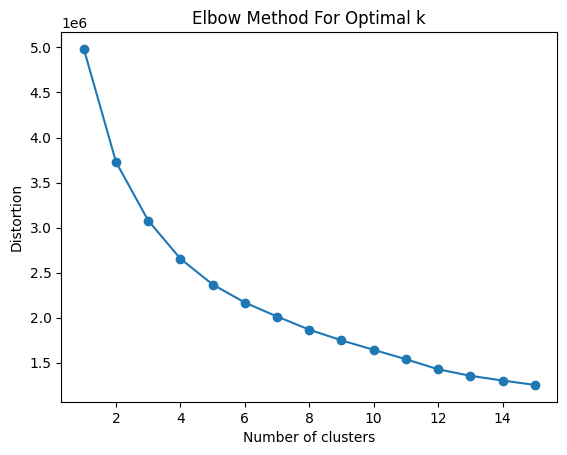

Class: Eopsaltria Australis
Average distances to cluster centers: [76.16371, 65.02245, 87.48348, 63.036312, 63.814316, 45.223774]
Silhouette score: 0.2639281153678894


C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


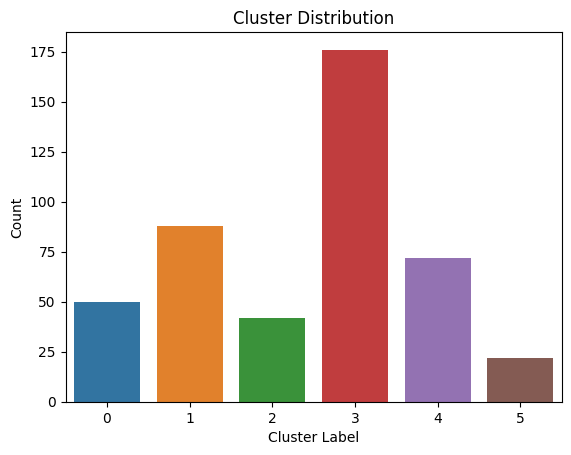

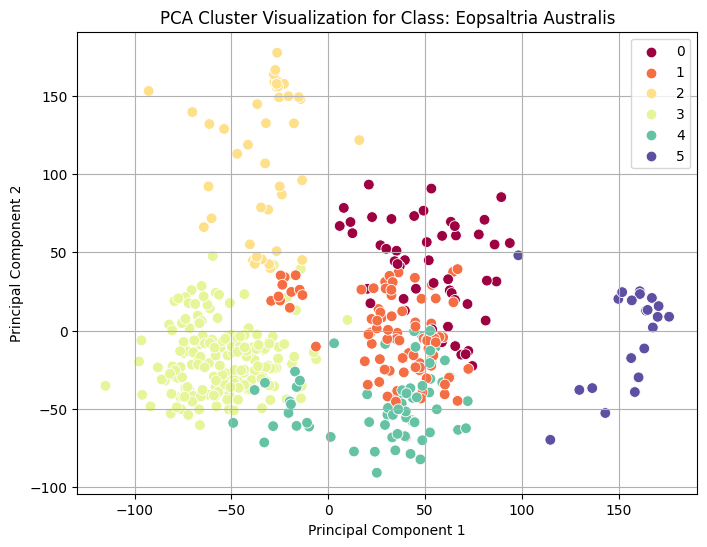

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=2007
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1631
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1719
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to supp

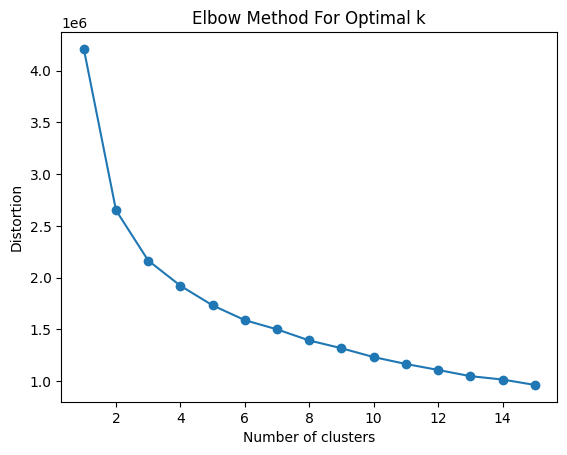

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Class: Felis Catus
Average distances to cluster centers: [45.92818, 65.70788, 97.202415, 56.507824, 57.462234, 89.246475]
Silhouette score: 0.22923868894577026


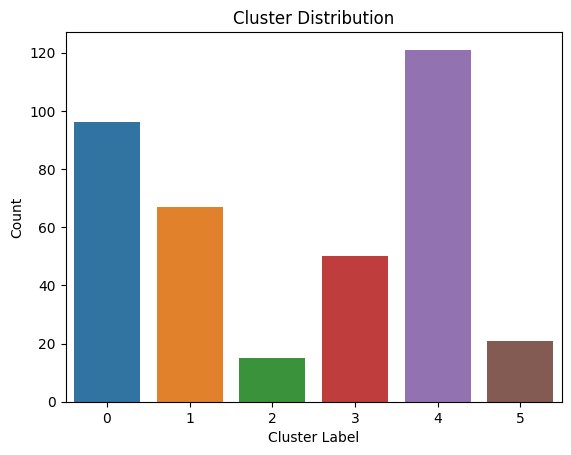

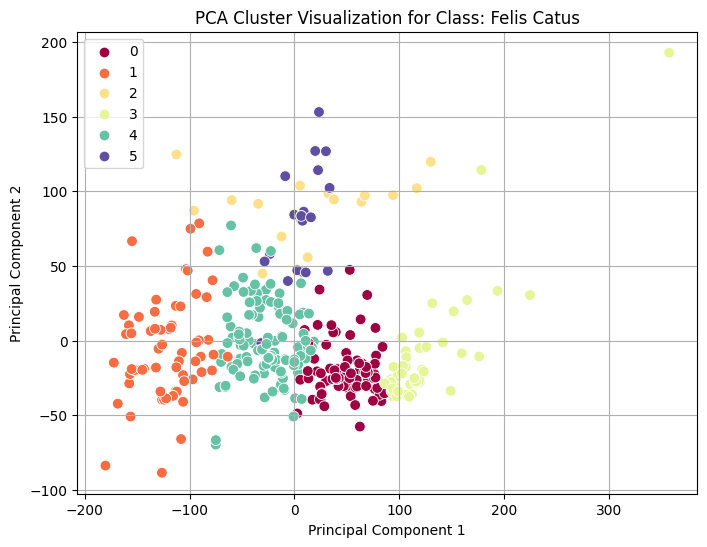

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1919
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1235
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1676
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=2028
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-p

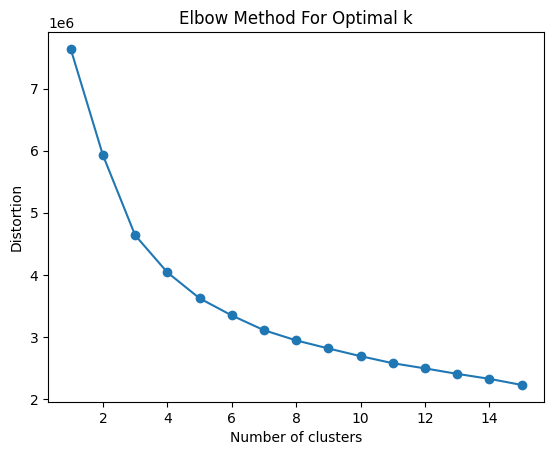

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Class: Pachycephala Rufiventris
Average distances to cluster centers: [67.51575, 55.30151, 70.51366, 67.7454, 74.18462, 61.79802]
Silhouette score: 0.19242553412914276


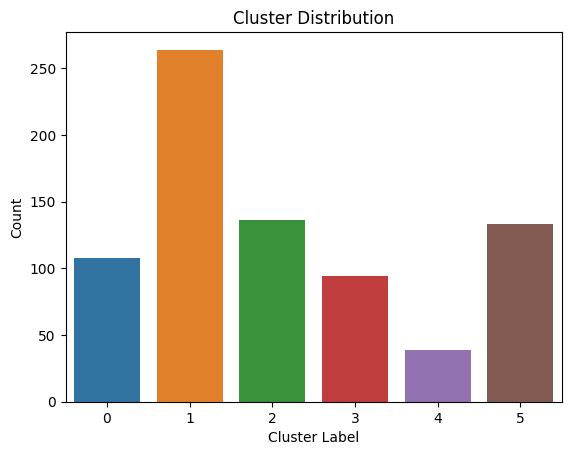

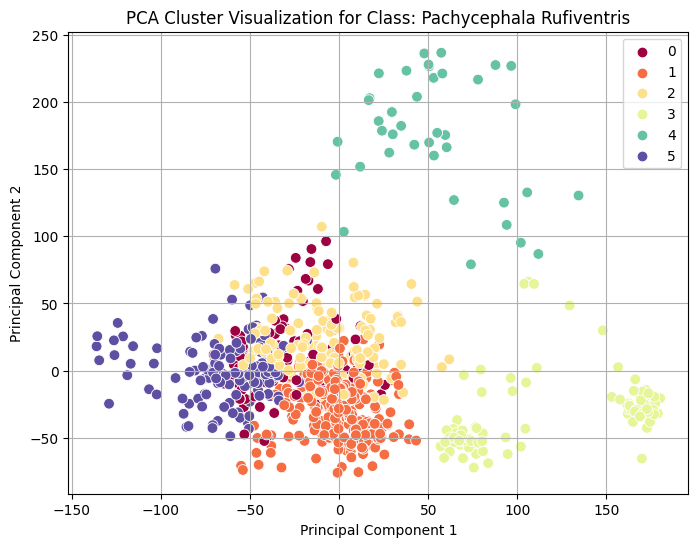

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=2029
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

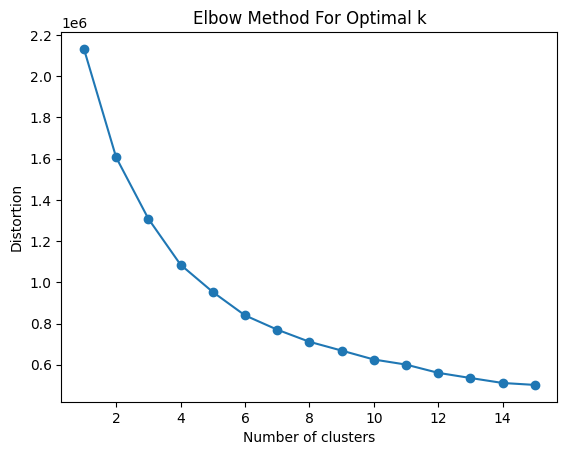

Class: Ptilotula Penicillata
Average distances to cluster centers: [52.69222, 56.56932, 73.60375, 42.92465, 49.188873, 84.04263]
Silhouette score: 0.277778297662735


C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


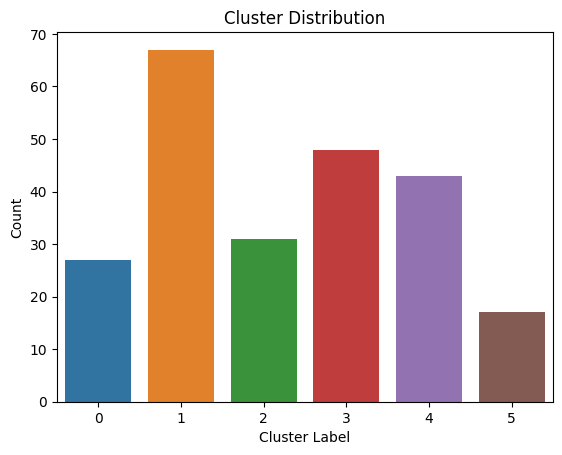

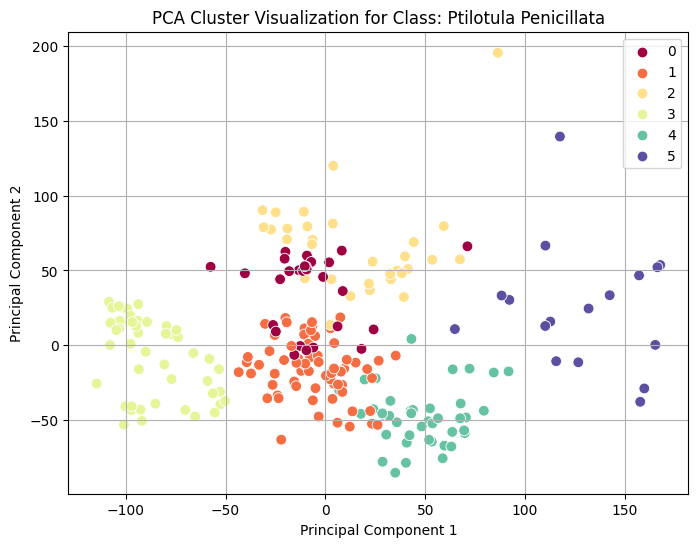

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1897
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X,

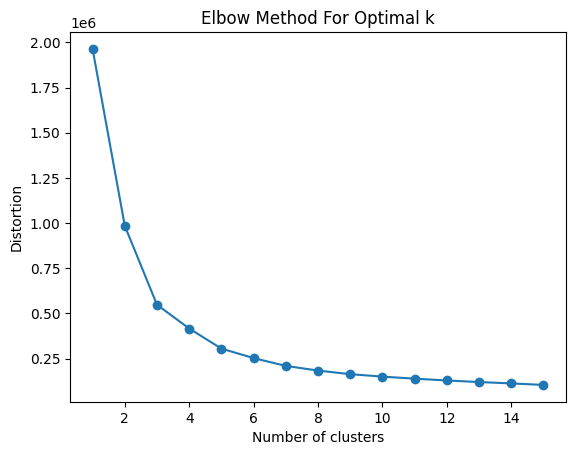

Class: Rattus Norvegicus
Average distances to cluster centers: [38.44208, 21.313023, 28.763409, 30.677355, 37.39999, 34.316574]
Silhouette score: 0.43278616666793823


C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


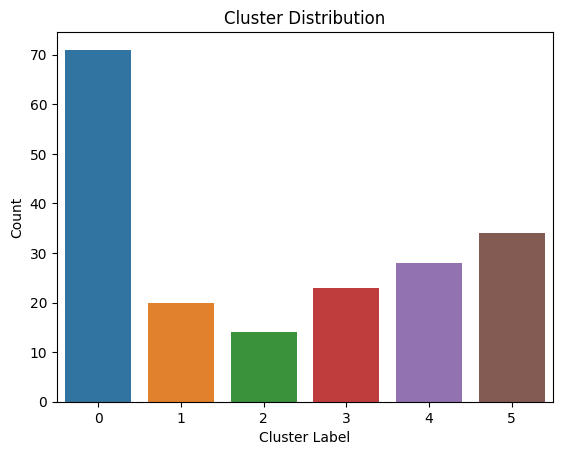

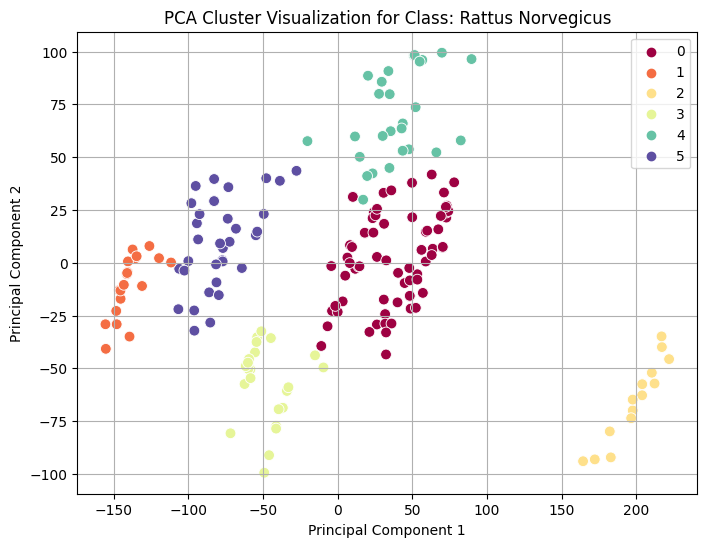

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1742
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1984
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1962
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to supp

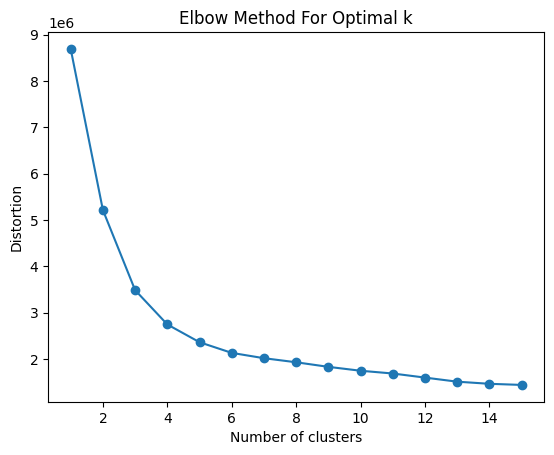

Class: Strepera Graculina
Average distances to cluster centers: [50.606586, 58.24262, 57.952282, 55.706566, 63.10802, 62.763256]
Silhouette score: 0.37123188376426697


C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


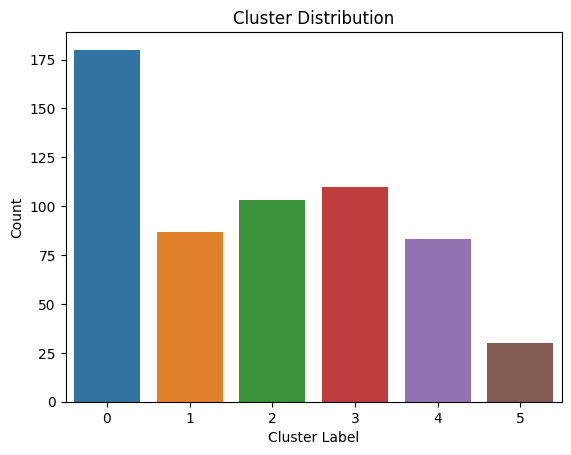

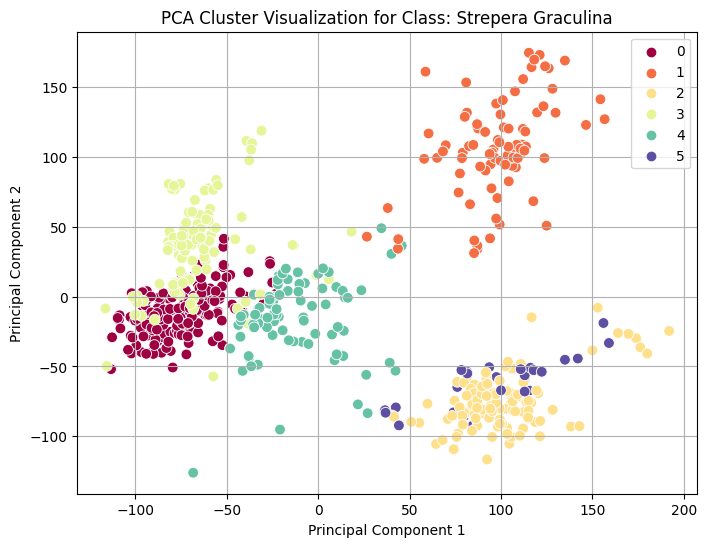

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=2029
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1346
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1212
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1300
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1962
  warnings.warn(
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

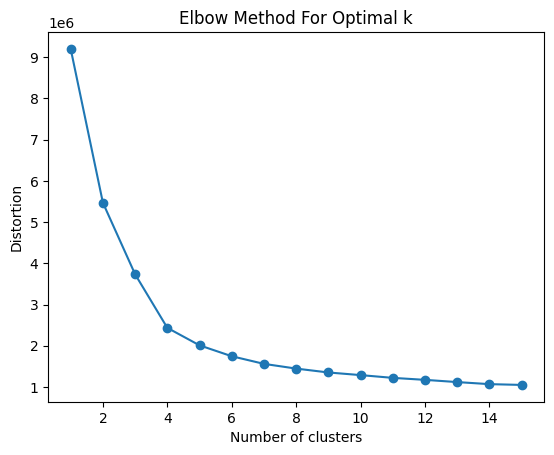

Class: Sus_Scrofa
Average distances to cluster centers: [36.42472, 53.77698, 47.552624, 58.96884, 26.633478, 43.999237]
Silhouette score: 0.294720858335495


C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


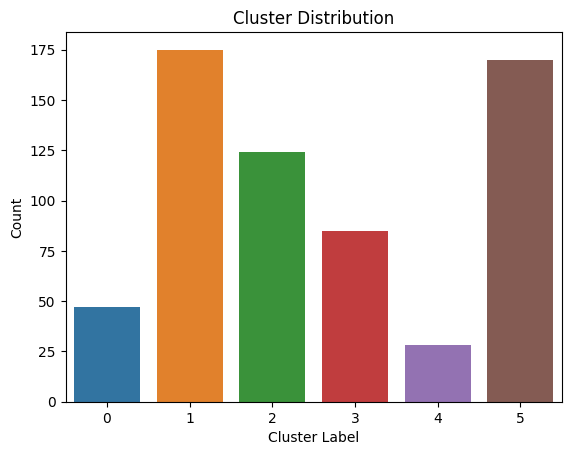

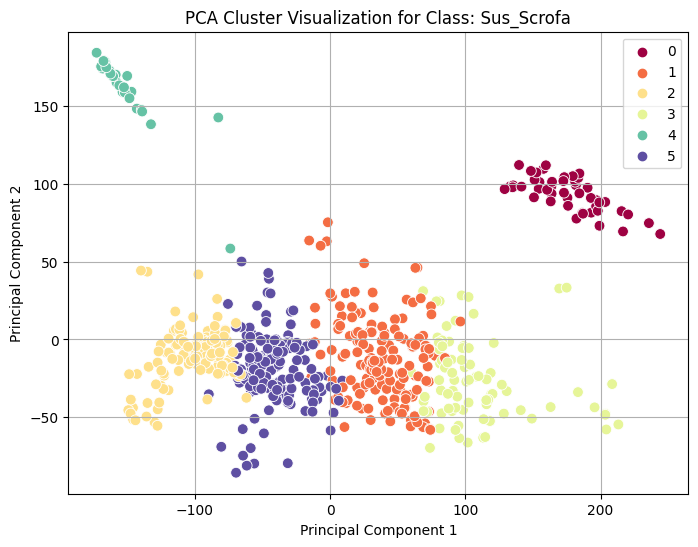

In [4]:
# Iterating over directories and processing audio files
for class_folder in os.listdir(main_folder_path):
    class_folder_path = os.path.join(main_folder_path, class_folder)

    # Ensure it is a folder
    if not os.path.isdir(class_folder_path):
        continue

    # Prepare output directories
    output_directory = os.path.join(cleaned_folder_path, class_folder, 'separated_sources')
    os.makedirs(output_directory, exist_ok=True)

    # Lists to store features and file paths for clustering
    features_list = []
    file_paths = []

    # Process each audio file in the class directory
    for audio_file in os.listdir(class_folder_path):
        audio_file_path = os.path.join(class_folder_path, audio_file)

        # Ensure it is a file
        if not os.path.isfile(audio_file_path):
            continue

        # Load the audio file
        sound = AudioSegment.from_file(audio_file_path)

        # Split the audio file on silence and save non-silent chunks
        chunks = split_on_silence(sound, min_silence_len=100, silence_thresh=-40)
        for i, chunk in enumerate(chunks):
            chunk_path = os.path.join(output_directory, f"{os.path.splitext(audio_file)[0]}_chunk{i}.wav")
            chunk.export(chunk_path, format="wav")

            # Extract features from the chunk and save the file path
            features = extract_features(chunk_path)
            features_list.append(features)
            file_paths.append(chunk_path)


    find_optimal_clusters(features_list, max_k=15)
    labels, cluster_centers = perform_clustering(features_list, n_clusters=6)

    avg_distances, sil_score = analyze_clusters(features_list, labels, cluster_centers)
    print(f"Class: {class_folder}")
    print(f"Average distances to cluster centers: {avg_distances}")
    print(f"Silhouette score: {sil_score}")

    plot_cluster_distribution(labels)
    visualize_clusters(np.vstack(features_list), labels, class_folder)
    save_results(labels, file_paths, os.path.join(cleaned_folder_path, class_folder))

# New section